<a href="https://colab.research.google.com/github/kevin-s-guo/python-clinical-research/blob/main/Data_Science_Tutorial_for_Med_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Science Primer for Clinical Research

This is a tutorial for basic data manipulation and performing common statistical tests used in clinical research with Python.

**No programming experience is necessary, and code is meant to be modular/copy-and-paste-able.**

Google Colaboratory is a free service that provides a Python environment with interactive notebook interface. This cannot be used for real patient data as the notebook and associated data live on a Google Drive, but all of the code in this tutorial can be used on a secure system. [This website](https://docs.jupyter.org/en/latest/install/notebook-classic.html) has instructions for installing Python and Jupyter on a local system.

We will not focus on Python syntax in this tutorial, but Learn X in Y Minutes is a good resource for [quick syntax reference](https://learnxinyminutes.com/docs/python/) and [other examples of scientific computing](https://learnxinyminutes.com/docs/pythonstatcomp/).

## Learning Objectives
1. Load data from a spreadsheet into Python.
2. Perform basic dataframe manipulations, such as sorting and filtering.
3. Prepare data for use in a scikit-learn statistical model.
4. Generate summary statistics, such as mean, median, and standard deviation, for a dataset
4. Perform common statistical tests for clinical research (chi-squared analysis, t-tests, logistic regression)
5. Generate commonly reported test statistics for the above analytic techniques (p values, odds ratios).
6. Run through the whole analytical process for a sample dataset and example PICO research question.


## Pre-Tutorial Survey

Before starting, please fill out the short redcap form [here](https://redcap.vanderbilt.edu/surveys/?s=9XD3L7JE3XXM8XTL)!

Link: https://redcap.vanderbilt.edu/surveys/?s=9XD3L7JE3XXM8XTL

Please save the survey queue link somewhere so that you can go back and do the post-tutorial survey.

## Introduction

Imagine that you're working on a project with the following PICO.

---

***Among adult patients, is drinking soda associated with diabetes or higher hemoglobin A1c scores?***

Population: adult patients (age >= 18)

Intervention/Exposure: drinking soda

Comparator: not drinking soda

Outcomes: diabetes, hemoglobin A1c

---

We'll go through each of the following steps one by one.

1. Loading the dataset into Python
2. Filtering the dataset by inclusion/exclusion criteria
3. Performing a statistical test

## Loading Data into Python

Let's start by loading a dataset from a csv or excel spreadsheet. Follow along by running each cell one at a time. You may need to save this notebook into your own Google drive in order to run/edit code.

Run the following code cell by pressing the little play button on the top left of the cell. The `[ ]` will turn into a play button if you scroll over or click into the code cell.

In [ ]:
import pandas as pd # pandas is a package used to hold tables (analogous to R dataframes)
# the above line loads the package so that it can be used

# this code will download sample data
!wget -O soda_drinking_diabetes.csv https://raw.githubusercontent.com/kevin-s-guo/python-clinical-research/main/soda_drinking_diabetes.csv
!wget -O soda_drinking_diabetes.xlsx https://raw.githubusercontent.com/kevin-s-guo/python-clinical-research/main/soda_drinking_diabetes.xlsx

data_csv = pd.read_csv("soda_drinking_diabetes.csv").set_index("Patient")
# .set_index("Patient") tells Python that the "Patient" column is the identifier
data_excel = pd.read_excel("soda_drinking_diabetes.xlsx").set_index("Patient")

# display the first 5 rows of the data
display(data_csv.head(5))

--2023-04-21 03:52:04--  https://raw.githubusercontent.com/kevin-s-guo/python-clinical-research/main/soda_drinking_diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 672 [text/plain]
Saving to: ‘soda_drinking_diabetes.csv’

soda_drinking_diabe 100%[===================>]     672  --.-KB/s    in 0s      

2023-04-21 03:52:04 (22.2 MB/s) - ‘soda_drinking_diabetes.csv’ saved [672/672]

--2023-04-21 03:52:04--  https://raw.githubusercontent.com/kevin-s-guo/python-clinical-research/main/soda_drinking_diabetes.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, 

,Age,SodaDrinker,HbA1c
Patient,,,
0,27,1,7.552972
1,27,1,6.207700
2,11,0,7.013407
3,13,0,8.220293
4,51,1,4.162365


The functions `read_csv()` and `read_excel()` take as input a filename (`soda_drinking_diabetes.csv` and `soda_drinking_diabetes.xlsx` in the above example respectively) and return a data frame (the data table in a form Python can understand) as output.

---

Let's take a look at how one would create a data frame (a table in Python). If you're loading data from a file, this part won't be necessary. We'll randomly generate data for this part.

In [ ]:
import numpy as np # numpy is a math package that does operations quickly
import pandas as pd

# let's make a dataframe where the ID column is called "Patient", and the other columns are "Age", "SodaDrinker", and "HbA1c"
data = pd.DataFrame(columns=['Age', 'SodaDrinker', 'HbA1c']).rename_axis("Patient")

# we'll populate that dataframe with random data

# age can be an integer from 0 to 100
data['Age'] = np.random.randint(low=0, high=100, size=1000)
# patients can either be soda drinkers (1) or not (0)
# side-note: in python, 0 is equivalent to "False" and 1 is equivalent to "True" for most operations
data['SodaDrinker'] = np.random.randint(low=0, high=2, size=1000) # high is set to 2 because it is an open interval on the upper bound
# for the purposes of this tutorial, hemoglobin a1c is normally distributed
data['HbA1c'] = np.random.normal(loc=5, scale=2, size=1000) # mean of 5 and standard deviation of 2

# let's add 1 to every patient's A1c if they are a soda drinker so there should be a significant relationship
data.loc[data['SodaDrinker'] == 1, 'HbA1c'] = data['HbA1c'] + 1

display(data)

,Age,SodaDrinker,HbA1c
Patient,,,
0,43,1,4.725735
1,76,0,7.924118
2,72,0,3.243364
3,84,0,1.424186
4,63,1,5.775406
...,...,...,...
995,37,1,9.837474
996,44,1,7.369890
997,42,0,0.061300


Each row has data for one patient, and each column is a variable. This is basically a table in Excel, but many Python packages for scientific computing are able to directly use these tables for analyses.

Next, let's add a calculated variable. Patients with a HgA1c greater than 6.5 are considered to have diabetes, so let's make a new column in our dataframe based on that definition.

In [ ]:
data['Diabetes'] = data['HbA1c'] >= 6.5
data['Diabetes'] = data['Diabetes'].astype(int) # .astype(int) converts from True/False to 1/0

display(data)

,Age,SodaDrinker,HbA1c,Diabetes
Patient,,,,
0,43,1,4.725735,0
1,76,0,7.924118,1
2,72,0,3.243364,0
3,84,0,1.424186,0
4,63,1,5.775406,0
...,...,...,...,...
995,37,1,9.837474,1
996,44,1,7.369890,1
997,42,0,0.061300,0


From the above output, you can see that rows where HbA1c is greater than 6.5 also have True in the Diabetes column. This type of operation where you define a new column based on other columns is very powerful. You can also add, subtract, or multiply columns together as follows.

`data['Age multiplied by HbA1c'] = data['Age'] * data['HbA1c']`

In [ ]:
# we don't need this column in our example, so we won't assign it a name in our data dataframe

age_multiplied_by_a1c = data['Age'] * data['HbA1c']

display(age_multiplied_by_a1c)

Patient
0      203.206616
1      602.232999
2      233.522229
3      119.631661
4      363.850592
          ...    
995    363.986543
996    324.275171
997      2.574609
998     48.869909
999    135.219240
Length: 1000, dtype: float64

## Data Filtering

Next, we want to filter the data by our inclusion and exclusion criteria. Recall the population in our PICO: adult patients (patients over the age of 18). We can select a subset of rows of a dataframe by using `.loc`. `.loc` allows you to access selected rows by index (name of each row / `Patient` id in this case).

In [ ]:
# data.loc allows you to select a subset of rows (indices) and columns

filtered_data = data.loc[data['Age'] >= 18].copy()
# this will select all of the patients who are older than 18

display(filtered_data)
# the function len() gives the length (or size) of a list/dataframe
print("Total number of patients who are older than 18:", len(filtered_data))

,Age,SodaDrinker,HbA1c,Diabetes
Patient,,,,
0,43,1,4.725735,0
1,76,0,7.924118,1
2,72,0,3.243364,0
3,84,0,1.424186,0
4,63,1,5.775406,0
...,...,...,...,...
994,25,0,3.084979,0
995,37,1,9.837474,1
996,44,1,7.369890,1


Total number of patients who are older than 18: 846


`.loc[]` is a very useful tool for accessing specific values in a data frame. More specifically, using `.loc[<row_index>, <column_name>]` will output the value at that row and column. Omitting the column name will give all columns. For example, `.loc[2, 'Soda Drinker']` will return a 0 or 1 corresponding to whether the patient 2 is a soda drinker.

More detailed documentation is available [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html).

## Describing Data

Python dataframes have a neat function called `describe()` that can give general summary statistics for all of the variables in a table. This can be helpful when making a demographics table. Let's try it for our dataset.

In [ ]:
# note that for binary variables, the "mean" represents fraction or percentage true

display(filtered_data.describe(include="all"))

# alternative method for just computing an individual value
print("Mean age:", filtered_data["Age"].mean())

,Age,SodaDrinker,HbA1c,Diabetes
count,846.000000,846.000000,846.000000,846.000000
mean,58.667849,0.490544,5.375586,0.299054
std,23.407319,0.500206,2.095239,0.458115
min,18.000000,0.000000,-1.184258,0.000000
25%,39.000000,0.000000,3.953502,0.000000
50%,58.000000,0.000000,5.323553,0.000000
75%,79.000000,1.000000,6.804391,1.000000
max,99.000000,1.000000,12.497395,1.000000


Mean age: 58.667848699763596


## Statistical Analysis

Now that we have our data prepared in a form that Python can understand, we can move on the interesting part.

We will cover chi-squared, t-test, and logistic regression (odds ratios). We will not discuss the appropriateness of each test, but this table from the PLAN Analysis readings is a useful reference.




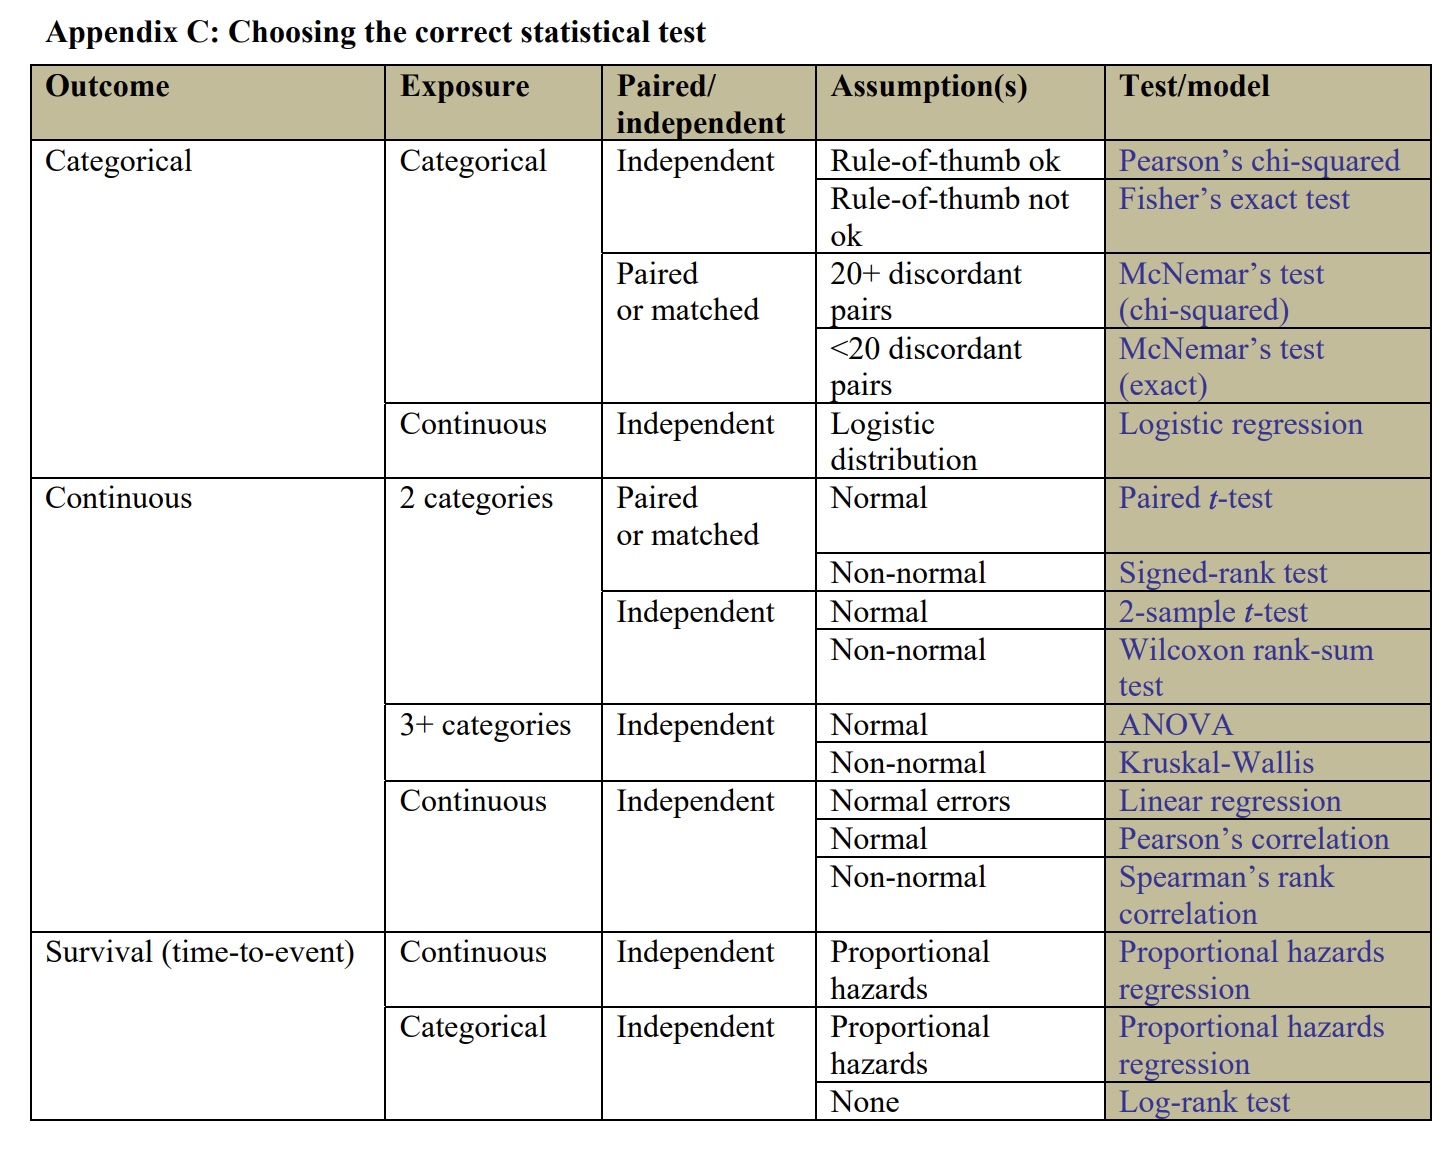

For this example, we will use three different statistical approaches: chi-squared testing, odds ratios (and logistical regression, when there are covariates), and two-sample t-testing. For most of these, we will use the `scipy`, or Scientific Python (SciPy) package. SciPy comes with a library of common statistical functions. Most of the tests in the above table can also be done with `scipy`. See [here](https://docs.scipy.org/doc/scipy/reference/stats.html) for the official SciPy reference.

### Chi-Squared Testing

SciPy has two main functions to compute Chi-Squared values. We will use one of them, `chi2_contingency`, as using contingency tables means that it can be extended to categorical variables with more than two possible categories.

In this example, we are trying to test if there is an association between drinking soda and having diabetes, so our contingency table should look something like this.

|       | Diabetes | No Diabetes|
| ----------- | ----------- | ---- |
| **Soda drinkers**      | # of soda drinkers with diabetes    | # of soda drinkers without diabetes
| **Non soda drinkers**   | # of non soda drinkers with diabetes      |  # of non soda drinkers without diabetes

We can automatically generate this contingency table using the `crosstab` function applied to a dataframe.

In [ ]:
contingency_table = pd.crosstab(filtered_data['SodaDrinker'], filtered_data['Diabetes'])

# reorder the rows and columns so that we match the above table
contingency_table = contingency_table.reindex([1, 0])[[1, 0]]

display(contingency_table)

Diabetes,1,0
SodaDrinker,,
1,175,240
0,78,353


Next, we can pass that contingency table into the `chi2_contingency` function as follows.

In [ ]:
from scipy.stats import chi2_contingency # load the chi2_contingency function

chi2_statistic, p_value, deg_freedom, expected_freq = chi2_contingency(contingency_table)

print("Chi-Squared statistic:", chi2_statistic)
print("Chi-Squared p value:", p_value)

Chi-Squared statistic: 57.29822864252116
Chi-Squared p value: 3.7449236163886465e-14


Since the data were generated in a way that soda drinkers have higher A1cs, the above test should have a low (statistically significant) p value.

Note that the `chi2_contingency()` function returns (outputs) 4 different values: the chi-squared statistic, the p value, the number of degrees of freedom, and the expected frequencies. We are only interested in the chi-squared statistic and the p value here, but the others can be accessed as well.

### Odds Ratios and Logistic Regression

Recall the general formula for odds ratio.

| | Cases | Controls |
|---|---|---|
**Exposed** |a|b|
**Not Exposed** |c|d|

$$\textrm{Odds Ratio} = \frac{a\ /\ c}{b\ /\ d} = \frac{a \times d}{b \times c}$$

Note how the above table is actually a contingency table, just like what we did earlier for chi-squared!

We can just pull those values and directly compute the odds ratio.

In [ ]:
a = contingency_table.loc[1, 1]
b = contingency_table.loc[1, 0]
c = contingency_table.loc[0, 1]
d = contingency_table.loc[0, 0]

print("Sample OR:", (a * d) / (b * c))

Sample OR: 3.2999465811965814


Computing odds ratios adjusted for covariates can be performed by fitting a logistic regression model to the data. For logistic regression, we will use the `statsmodels` package. `statsmodels` is a commonly used package for data science applications, and has similar formula syntax as in R.

For the purposes of this activity, we'll use age as a covariate to control for.



In [ ]:
from statsmodels.formula.api import logit

# formula syntax: dependent_variable ~ independent_variable(s) + covariate(s)
logistic_model = logit(formula='Diabetes ~ SodaDrinker + Age', data=filtered_data)

result = logistic_model.fit()

# the adjusted odds ratios are computed from the logistic regression parameters
odds_ratios = np.exp(result.params)
# compute 5% and 95% confidence intervals
odds_ratios_confidence = np.exp(result.conf_int())
odds_ratios_confidence['Odds Ratio'] = odds_ratios

# name columns appropriately
odds_ratios_confidence.columns = ['5% (Lower Bound)', '95% (Upper Bound)', 'Odds Ratio']
display(odds_ratios_confidence)

# pull out just the adjusted odds ratio for drinking soda
# notice how we using .loc to pull out the value of the column 'Odds Ratio' for the row called 'SodaDrinker'
soda_drinker_adjusted_odds_ratio = odds_ratios_confidence.loc['SodaDrinker', 'Odds Ratio']
print("Adjusted Odds Ratio for Drinking Soda:", round(soda_drinker_adjusted_odds_ratio,2))

Optimization terminated successfully.
         Current function value: 0.574880
         Iterations 5


,5% (Lower Bound),95% (Upper Bound),Odds Ratio
Intercept,0.138215,0.344308,0.218148
SodaDrinker,2.412881,4.514367,3.300398
Age,0.993718,1.006759,1.000217


Adjusted Odds Ratio for Drinking Soda: 3.3


In this case, the odds ratio for drinking soda should be close to the one computed (around 3.3), since controlling for age should not affect the relationship between drinking soda and diabetes (based on how the dataset was generated). The confidence interval for age should include 1.0 (insignificant), because there is not a significant relationship between age and diabetes in this dataset.

Recall that odds ratio represents an association between two variables -- in this example, controlled for age, soda drinkers have a 3.3x increased odds of having diabetes compared to non-soda drinkers.

### Two-Sample T-testing

The hypothesis we are testing here is whether soda drinkers have statistically significant differences in hemoglobin A1c values. In order to run a two-sample t-test on our dataset, we need to separate our dataset into two separate lists of HbA1c values, one for soda drinkers, and one for non soda drinkers.

In [ ]:
soda_drinkers_hba1c = filtered_data.loc[filtered_data['SodaDrinker'] == 1, 'HbA1c']
non_soda_drinkers_hba1c = filtered_data.loc[filtered_data['SodaDrinker'] == 0, 'HbA1c']

display('Soda Drinkers', soda_drinkers_hba1c, '-----','Non Soda Drinkers', non_soda_drinkers_hba1c)

'Soda Drinkers'

Patient
0      4.725735
4      5.775406
5      4.967807
6      8.500689
7      4.641484
         ...   
989    2.479602
992    5.537613
995    9.837474
996    7.369890
999    3.977036
Name: HbA1c, Length: 415, dtype: float64

'-----'

'Non Soda Drinkers'

Patient
1      7.924118
2      3.243364
3      1.424186
8      3.554401
9      6.996332
         ...   
986    3.312330
988    3.585906
991    5.607256
994    3.084979
997    0.061300
Name: HbA1c, Length: 431, dtype: float64

Next, we can use the `ttest_ind` function in SciPy to compute the two-sample t-test result and associated p value. Our hypothesis corresponds to the two-sided test, but if we wanted a one-sided test, we can adjust the `alternative` parameter to be `less` or `greater` (for testing if the mean of the first of the two lists of values is less or greater than the mean of the latter).

In [ ]:
from scipy.stats import ttest_ind

# be careful with the value for "alternative"
t_statistic, p_value = ttest_ind(soda_drinkers_hba1c, non_soda_drinkers_hba1c, alternative='two-sided')

print("Test Statistic:", t_statistic)
print("P value:", p_value)

Test Statistic: 8.771661297587084
P value: 9.609414333025934e-18


SciPy has functions for most other commonly used statistical tests, and those are usually used in a similar way.

---

# Try it yourself!

Roughly same steps as above with a different sample dataset and example PICO but with some code missing.

---

***Among patients with diabetes with HgA1c > 8.0, does drug A reduce HgA1c compared to placebo?***

Population: patients with HgA1c > 8.0

Intervention/Exposure: drug A

Comparator: placebo

Outcomes: change in HgA1c (continuous), final HgA1c less than 8 (yes or no)

---

We will also test for differences in adverse events (hypoglycemia) and control for patient exercise habits.

First, run this code cell to download the dataset.

In [ ]:
# download the data file
!wget -O sample_diabetes_data.csv https://raw.githubusercontent.com/kevin-s-guo/python-clinical-research/main/sample_diabetes_data.csv
!wget -O check_answers.py https://raw.githubusercontent.com/kevin-s-guo/python-clinical-research/main/check_answers.py

--2023-04-21 17:17:49--  https://raw.githubusercontent.com/kevin-s-guo/python-clinical-research/main/sample_diabetes_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3966427 (3.8M) [text/plain]
Saving to: ‘sample_diabetes_data.csv’

sample_diabetes_dat 100%[===================>]   3.78M  --.-KB/s    in 0.05s   

2023-04-21 17:17:49 (81.8 MB/s) - ‘sample_diabetes_data.csv’ saved [3966427/3966427]

--2023-04-21 17:17:49--  https://raw.githubusercontent.com/kevin-s-guo/python-clinical-research/main/check_answers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

Suppose this dataset includes all patients with diabetes (defined as HgA1c > 6.5) at a single medical center.

The data is stored as `sample_diabetes_data.csv`. First, try to read the dataset. Use the question marks (`?`) as placeholders for your own code. Do not change variable names as that will interfere with the automatic assessment functions.

At various points in the tutorial, there will be code cells that will check your work.



In [ ]:
# importing necessary packages
import pandas as pd
import numpy as np

# load the dataset from sample_diabetes_data.csv
dataset = ?

print(len(dataset)) # show the size of the dataset -- it should have 100,000 rows/data points (patients, or rows)

display(dataset.head(50)) # display the first 50 entries

We are interested in patients with initial HgA1c > 8.0. Filter the dataset to only include the patients that meet this criteria.

In [ ]:
# HINT: the HbA1c column is called 'Initial_HbA1c'
filtered_dataset = ?

# sort the dataset by HbA1c
filtered_dataset = filtered_dataset.sort_values(by="Initial_HbA1c")

# confirm that the dataset is filtered properly
display(filtered_dataset) # show a selection of patients with the lowest/high HgbA1cs

If your filtering code worked correctly, the lowest initial HbA1c values displayed above should be at least 8.0.

Next, let's try to calculate the fraction of patients who received drug A.

In [ ]:
# YOUR CODE BELOW
# HINT: ReceivedDrugA is 0 if the patient received placebo and 1 if the patient received drug A
# HINT: you can use print() or display() to show tables/computations


# fill in this question mark with the correct numbers
fraction_drugA = ?

Now that we've examined the dataset and looked at some summary statistics, let's do ahead and test whether drug A led to a significant change in HbA1c compared to placebo.

First, calculate the change in A1c (difference between `Final_A1c` and `Initial_A1c`), and calculate the mean A1c change in patients who received drug A.

In [ ]:
# YOUR CODE BELOW
# HINT: is there a way to filter out patients who recieved placebo?


filtered_dataset['A1c_Change'] = ?
mean_drugA_a1c_change = ?

Then calculate a two-sided t-test p value between the placebo and drug A arms for the `A1c_Change` column

In [ ]:
# YOUR CODE BELOW




t_test_statistic, t_test_p_value = ttest_ind(?)
print(t_test_p_value)

Next, let's compare the endpoint of decreasing A1c below 8 using odds ratios/logistic regression.

Add a binary (0 or 1) variable for whether the patient's final A1c was below 8.

In [ ]:
# HINT: how did we add a binary variable for if a patient had diabetes in the example?

filtered_dataset["FinalA1c_Below8"] = ?

Now, compute a sample odds ratio for this endpoint (final A1c being below 8) using a formula like in the example.

In [ ]:
# YOUR CODE BELOW
# HINT: how did we create a contingency table?






odds_ratio = ?

A possible confounder is whether the patient was participating in an exercise routine during the study period, because patients who are actively exercising may naturally have a decreased A1c.

Let's use logistic regression to control for that exercise patterns and compute adjusted odds ratios for both drug A and exercise.

In [ ]:
# YOUR CODE BELOW
# HINT: 'Exercise' is a binary variable indicating whether the patient had an exercise routine



adjusted_odds_ratio_drugA = ?
adjusted_odds_ratio_exercise = ?

One of the potential adverse effects of drug A is hypoglycemia. Let's use chi-squared analysis to determine whether there is a significant difference in amount of patients who experienced hypoglycemia.

In [ ]:
# YOUR CODE BELOW
# HINT: how did we generate the contingency table?





chi2_statistic, chi2_p_value, deg_freedom, expected_freq = chi2_contingency(?)
print(chi2_p_value)

# Knowledge Check

Based on code from the above section, running the following cell will generate a score and let you know what sections may not be working, along with some feedback for common mistakes.

In [ ]:
import check_answers

score = 0
max_score = 10
score += check_answers.load(dataset)
score += check_answers.filter(filtered_dataset)
score += check_answers.frac_drugA(fraction_drugA)
score += check_answers.mean_a1c_change(mean_drugA_a1c_change)
score += check_answers.t_test(t_test_p_value)
score += check_answers.a1c_below8(filtered_dataset)
score += check_answers.odds_ratio(odds_ratio)
score += check_answers.adjusted_odds_ratio_drugA(adjusted_odds_ratio_drugA)
score += check_answers.adjusted_odds_ratio_exercise(adjusted_odds_ratio_exercise)
score += check_answers.chi_squared(chi2_p_value)

print("Total score:", score, "out of", max_score, "maximum possible points")

# Post-Tutorial Survey

Please fill out the post-tutorial survey at your original survey queue link or [here](https://redcap.vanderbilt.edu/surveys/?s=9XD3L7JE3XXM8XTL)! We appreciate any and all feedback!

Link: https://redcap.vanderbilt.edu/surveys/?s=9XD3L7JE3XXM8XTL